In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [24]:
model=open('model.pkl', 'rb')
rf=pickle.load(model)

In [25]:
test_df = pd.read_excel('Final_Test_set.xlsx')

test_df.head()

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,Jet Airways,27/03/2019,Delhi,Cochin,DEL → MAA → BOM → COK,05:10,18:50,13h 40m,2 stops,In-flight meal not included,8728
1,1,Jet Airways,1/05/2019,Kolkata,Banglore,CCU → DEL → BLR,20:25,14:25 02 May,18h,1 stop,No info,11467
2,2,Multiple carriers,6/03/2019,Delhi,Cochin,DEL → BOM → COK,09:00,15:30,6h 30m,1 stop,No info,15078
3,3,Multiple carriers,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:00,01:30 07 Jun,8h 30m,1 stop,No info,7198
4,4,Air India,24/06/2019,Delhi,Cochin,DEL → BOM → COK,21:00,07:40 25 Jun,10h 40m,1 stop,No info,8372


In [26]:
test_df=test_df.drop(columns=['Unnamed: 0'], axis=1)

In [27]:
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,27/03/2019,Delhi,Cochin,DEL → MAA → BOM → COK,05:10,18:50,13h 40m,2 stops,In-flight meal not included,8728
1,Jet Airways,1/05/2019,Kolkata,Banglore,CCU → DEL → BLR,20:25,14:25 02 May,18h,1 stop,No info,11467
2,Multiple carriers,6/03/2019,Delhi,Cochin,DEL → BOM → COK,09:00,15:30,6h 30m,1 stop,No info,15078
3,Multiple carriers,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:00,01:30 07 Jun,8h 30m,1 stop,No info,7198
4,Air India,24/06/2019,Delhi,Cochin,DEL → BOM → COK,21:00,07:40 25 Jun,10h 40m,1 stop,No info,8372
...,...,...,...,...,...,...,...,...,...,...,...
2132,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
2133,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
2134,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
2135,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


#convert these into numarical values as before

In [28]:
test_df.dropna(inplace=True)

def change_into_datetime(col):
    test_df[col] = pd.to_datetime(test_df[col])

for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

test_df['Journey_date'] = test_df['Date_of_Journey'].dt.day
test_df['Journey_month'] = test_df['Date_of_Journey'].dt.month

def extract_hour(test_df,col):
    test_df[col + '_hour'] = test_df[col].dt.hour

def extract_minute(train_df,col):
    test_df[col + '_minute'] = test_df[col].dt.minute


extract_hour(test_df,'Dep_Time')
extract_minute(test_df,'Dep_Time')

extract_hour(test_df,'Arrival_Time')
extract_minute(test_df,'Arrival_Time')

test_df.drop(columns=['Arrival_Time','Dep_Time','Date_of_Journey'], axis=1, inplace=True)

C:\Users\Tony\AppData\Local\Temp\ipykernel_16056\1370086651.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  test_df[col] = pd.to_datetime(test_df[col])
C:\Users\Tony\AppData\Local\Temp\ipykernel_16056\1370086651.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df[col] = pd.to_datetime(test_df[col])
C:\Users\Tony\AppData\Local\Temp\ipykernel_16056\1370086651.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df[col] = pd.to_datetime(test_df[col])


In [29]:
duration = list(test_df['Duration'])
for i in range (len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
              duration[i] = duration[i] + ' 0m'
        else:
              duration[i] = '0h ' + duration[i]


test_df['Duration'] = duration

def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

test_df['Duration Hours'] = test_df['Duration'].apply(hour).astype(int)
test_df['Duration Minutes'] = test_df['Duration'].apply(minute).astype(int)

test_df.drop(['Duration','Additional_Info'],axis=1,inplace=True)

In [30]:
objects_col = [col for col in test_df.columns if test_df[col].dtype=='O']
objects_col

numerical_col = [col for col in test_df.columns if test_df[col].dtype!='O']
numerical_col

['Price',
 'Journey_date',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration Hours',
 'Duration Minutes']

In [31]:
objects = test_df[objects_col]

In [32]:
Airlines_df = pd.get_dummies(objects['Airline'], dtype=int)

Destination_df = pd.get_dummies(objects['Destination'], dtype=int)

Source_df = pd.get_dummies(objects['Source'], dtype=int)

route_lst = objects['Route'].str.split('→')
objects['Route_1'] = route_lst.str[0]
objects['Route_2'] = route_lst.str[1]
objects['Route_3'] = route_lst.str[2]
objects['Route_4'] = route_lst.str[3]
objects['Route_5'] = route_lst.str[4]

C:\Users\Tony\AppData\Local\Temp\ipykernel_16056\3504529501.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objects['Route_1'] = route_lst.str[0]
C:\Users\Tony\AppData\Local\Temp\ipykernel_16056\3504529501.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objects['Route_2'] = route_lst.str[1]
C:\Users\Tony\AppData\Local\Temp\ipykernel_16056\3504529501.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [33]:
for i in ['Route_3','Route_4','Route_5']:
    objects[i].fillna('None',inplace=True)

C:\Users\Tony\AppData\Local\Temp\ipykernel_16056\1101527732.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  objects[i].fillna('None',inplace=True)
C:\Users\Tony\AppData\Local\Temp\ipykernel_16056\1101527732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objects[i].fillna('None',inplace=True)


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    objects[i] = le.fit_transform(objects[i])

C:\Users\Tony\AppData\Local\Temp\ipykernel_16056\2977048886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objects[i] = le.fit_transform(objects[i])
C:\Users\Tony\AppData\Local\Temp\ipykernel_16056\2977048886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objects[i] = le.fit_transform(objects[i])
C:\Users\Tony\AppData\Local\Temp\ipykernel_16056\2977048886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [36]:
objects.drop(['Route'],axis=1,inplace=True)

C:\Users\Tony\AppData\Local\Temp\ipykernel_16056\3951685402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objects.drop(['Route'],axis=1,inplace=True)


In [37]:
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

objects['Total_Stops'] = objects['Total_Stops'].map(dict)

C:\Users\Tony\AppData\Local\Temp\ipykernel_16056\4206705827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objects['Total_Stops'] = objects['Total_Stops'].map(dict)


In [38]:
test_data = pd.concat([objects,Airlines_df,Source_df,Destination_df,test_df[numerical_col]],axis=1)

In [39]:
test_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [40]:
test_data.shape

(2136, 37)

In [44]:
price_data=test_data['Price']

In [46]:
test_data=test_data.drop(columns=['Price'], axis=1)

In [49]:
pd.set_option('display.max_columns',37)
test_data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration Hours,Duration Minutes
0,2,3,27,4,2,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,27,3,5,10,18,50,13,40
1,1,2,13,3,8,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,5,20,25,14,25,18,0
2,1,3,7,5,8,4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,6,3,9,0,15,30,6,30
3,1,3,7,5,8,4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,6,6,17,0,1,30,8,30
4,1,3,7,5,8,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,24,6,21,0,7,40,10,40


In [50]:
test_data.shape

(2136, 36)

In [51]:
test_preds = rf.predict(test_data)

In [53]:
test_preds
#these are the predicted prices now lets compare these with real values

array([ 9918.58394535, 11393.29477695, 14514.51970843, ...,
        8157.62231773, 11672.20509535, 12308.35037466])

In [58]:
from sklearn import metrics

r2_score = metrics.r2_score(price_data,test_preds)
print('Accuracy is:{}'.format(r2_score))

Accuracy is:0.5323815529608332


<Axes: xlabel='Price', ylabel='Count'>

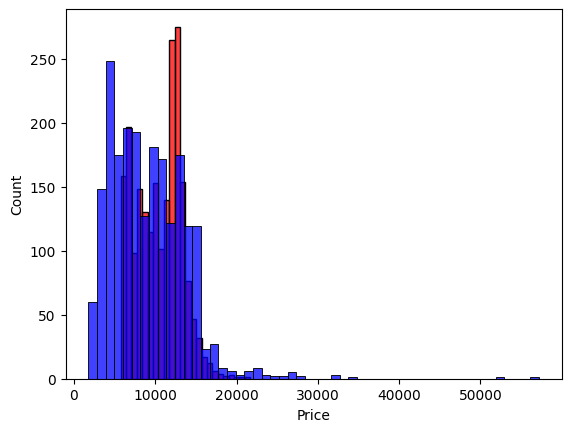

In [59]:
sns.histplot(test_preds,color='red')
sns.histplot(price_data,color='blue')

In [60]:
import pickle

In [63]:
dt=open('model_dt.pkl','rb')
dt=pickle.load(dt)

In [64]:
test_preds_dt = dt.predict(test_data)

In [65]:
r2_score_dt = metrics.r2_score(price_data,test_preds_dt)
print('Accuracy of dt model is:{}'.format(r2_score_dt))

Accuracy of dt model is:0.15159878444282904


<Axes: xlabel='Price', ylabel='Count'>

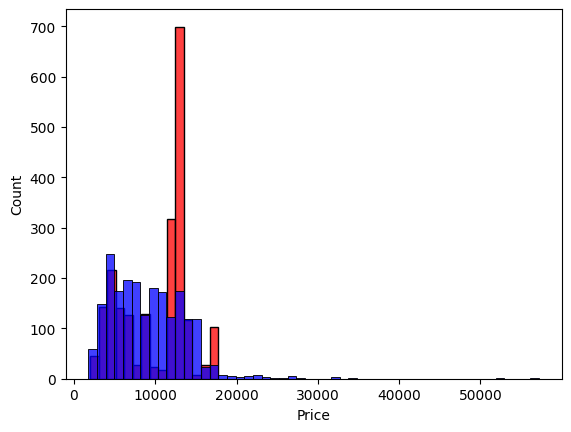

In [66]:
sns.histplot(test_preds_dt,color='red')
sns.histplot(price_data,color='blue')

In [67]:
#even after fine tuning RandomForestRegressor model gave more accuracy compared to decision tree model